# Import Data 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Assign path string to variable using raw string r'
path = r'D:\Docs\Career Foundry\II. Data Immersion\6. Advanced Analytics & Dashboard Design\Spotify Database - Alina Racu'

In [32]:
# Import csv file
df = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "df_tracks_features.csv" ))

# Consistency Checks

In [33]:
# Show all columns
pd.options.display.max_columns = None

In [34]:
# Check
df.head()

,Unnamed: 0,position,track_name,artist,streams,date,country,album,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_date,_merge
0,0,12,Dile Que Tu Me Quieres,Ozuna,8982,2017-01-01,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
1,1,12,Dile Que Tu Me Quieres,Ozuna,8048,2017-01-02,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
2,2,12,Dile Que Tu Me Quieres,Ozuna,8425,2017-01-03,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
3,3,12,Dile Que Tu Me Quieres,Ozuna,8808,2017-01-04,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both
4,4,11,Dile Que Tu Me Quieres,Ozuna,8307,2017-01-05,Ecuador,Odisea,False,0.773,0.757,-4.959,1,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,2017,2017-08-25,both


In [35]:
# Remove irrelevant columns as well as categorical variables; leave only numerical
df = df.drop(columns = ["Unnamed: 0", "_merge", "position", "track_name", "artist","date", "country", "album", "explicit", "mode", "release_year", "release_date"])

In [36]:
# Check
df.head()

,streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,8982,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520
1,8048,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520
2,8425,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520
3,8808,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520
4,8307,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520


# The Elbow Technique

In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [38]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-3.950024692755026e+16,
 -1.5104739657938646e+16,
 -7137069559563563.0,
 -5047898082935615.0,
 -3672369794613760.5,
 -2588123053947670.0,
 -1980407138085010.8,
 -1695330098309831.5,
 -1415649702920981.0]

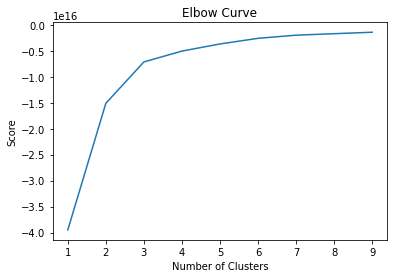

In [39]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from 2 to 3 on the x-axis, but after that, the curve straightens out. This means that the elbow, or the optimal count for the clusters, is 3.

# k-Means Clustering

In [40]:
# Create the k-means object
# n_jobs assigns your machine’s processor to work on the task at hand; this will boost the speed of the process
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [42]:
# Fit the k-means object to the data, similartly to when I fit the data into the regression algorithm in the previous exercise
# Creates clusters
kmeans.fit(df)

C:\Users\Alina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [43]:
# Create a column in the dataframe with values corresponding to which cluster every observation belong
df["clusters"] = kmeans.fit_predict(df)

C:\Users\Alina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [44]:
# View clusters
df.head()

,streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
0,8982,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,0
1,8048,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,0
2,8425,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,0
3,8808,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,0
4,8307,0.773,0.757,-4.959,0.0526,0.0864,0.000004,0.0727,0.858,88.006,226520,0


In [45]:
# Check how many observations fall into each cluster
df["clusters"].value_counts()

0    518024
2     18226
1      2680
Name: clusters, dtype: int64

The majority of the observations in the dataframe fall in cluster  0.

# Visualize Clusters

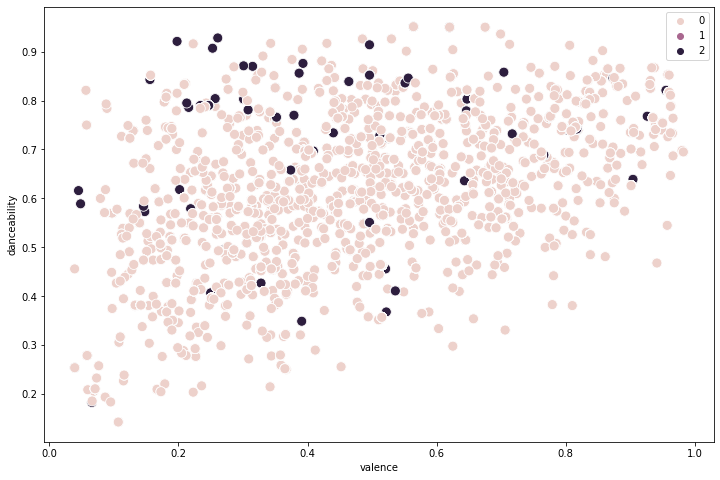

In [52]:
# Plot the clusters for the "valence" and "danceability" variables, assigning each cluster a different color

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df["valence"], y=df["danceability"], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel("valence") # Label x-axis
plt.ylabel("danceability") # Label y-axis
plt.show()

The pink cluster coded as "0" is the most populated cluster and gathers data from all ranges on both variables. The cluster colored as purple and coded as "1" is almost invisible, while the dark purple cluster coded as "2" shows scattered data with more of them on the higher range of danceability and medium on music positiveness or valence.
Unfortunately, the clustering technique does not work well on the two variables due to lack of a linear connection between them.

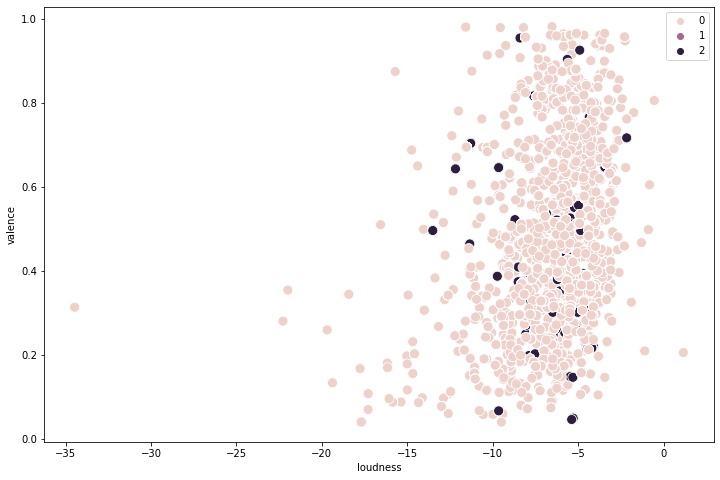

In [64]:
# Plot the clusters for the "loudness" and "valence" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df["loudness"], y=df["valence"], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel("loudness") 
plt.ylabel("valence") 
plt.show()

As with the previous scatterplot, the clustering is not very obvious on the "loudness" and "valence" variables.

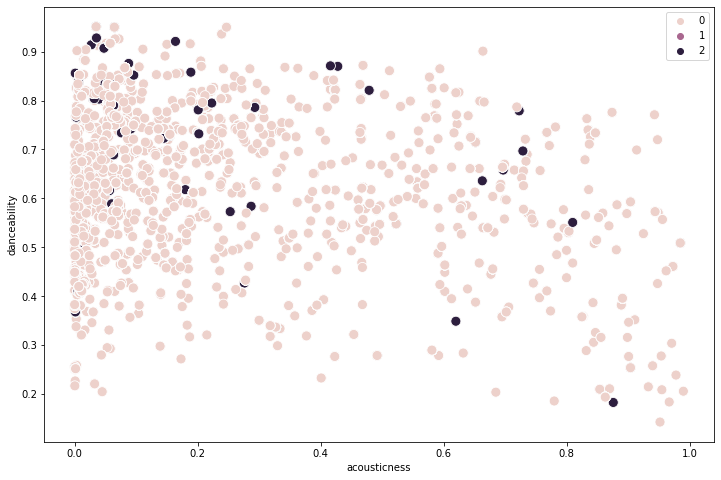

In [63]:
# Plot the clusters for the "acousticness" and "danceability" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df["acousticness"], y=df["danceability"], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel("acousticness") 
plt.ylabel("danceability") 
plt.show()

The pink cluster shows that data points are more dense on the low range of acousticness and medium to high range of danceability, implying that non-acousic songs tend to be more danceable. However, there is still a large amount of observations that are scattered on the chart contradicting this assumption.
The dark purple data is again lacking shape.

In [50]:
# Use loc function to relabel the clusters from numbers to color names
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
df.groupby('cluster').agg({'danceability':['mean', 'median'], 
                         'loudness':['mean', 'median'], 
                         'acousticness':['mean', 'median'],
                           'valence':['mean', 'median']})

danceability         loudness        acousticness          \
                    mean median      mean median         mean  median   
cluster                                                                 
dark purple     0.714164  0.762 -5.801929 -5.936     0.176663  0.0847   
pink            0.677428  0.696 -5.874909 -5.975     0.177693  0.0739   
purple          0.731058  0.762 -5.833322 -6.021     0.179940  0.0255   

              valence         
                 mean median  
cluster                       
dark purple  0.514751  0.494  
pink         0.543300  0.528  
purple       0.595056  0.608

In [62]:
df["loudness"].min()

-34.475

The clusters do not differ considerably from each other. 
The pink cluster has the lowest danceability mean compared to the other clusters and falls in between on valence/music positiveness compared to the other clusters.
There is almost no difference among clusters in terms of loudness and acousticness means.

The correlations performed in earlier exercises showed weak to moderate correlations between the variables in this data set. This has been highlighted again with the clustering technique. Given the immense variety of music and the subjective nature of music preferences, it is difficult to find patterns or differentiate among song features with the present variables. Perhaps, it would help having data on music genres and comparing the features within the respective genres to find potential patterns.